In [10]:

import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('/Users/someone./Documents/Github/github.com/Som3sh/Python/Paper/Data/revenue_data.csv', parse_dates=['Date'], index_col='Date')




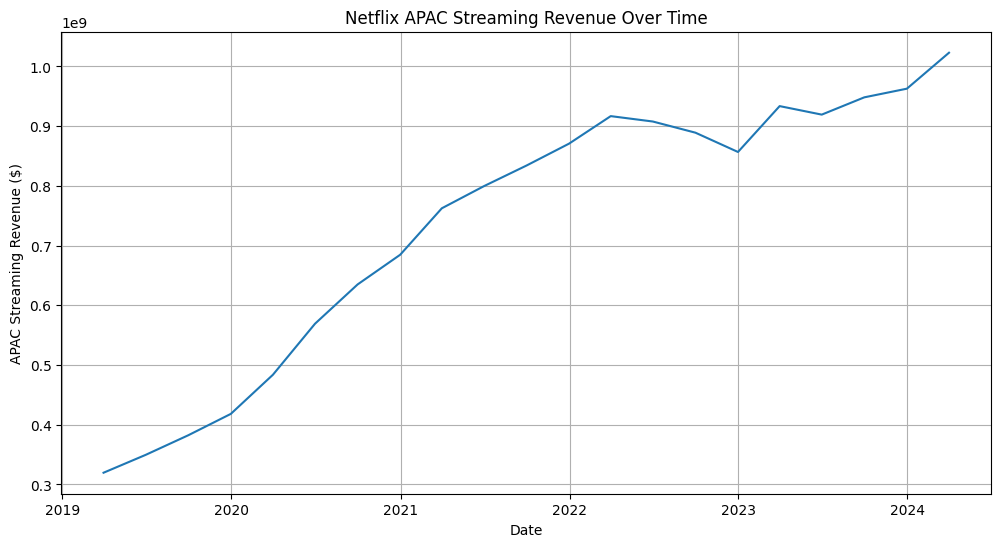

In [12]:
# Sort the index to ensure chronological order
df = df.sort_index()

# Plot APAC Streaming Revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['APAC Streaming Revenue'])
plt.title('Netflix APAC Streaming Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('APAC Streaming Revenue ($)')
plt.grid(True)
plt.show()

In [13]:

# Prepare data for ARIMA model
revenue_data = df['APAC Streaming Revenue']

# Fit ARIMA model
model = ARIMA(revenue_data, order=(1,1,1))
results = model.fit()

# Generate predictions for the next 8 quarters
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), periods=8, freq='Q')
future_predictions = results.forecast(steps=8)

# Create a DataFrame with the predictions
future_df = pd.DataFrame({'Predicted Revenue': future_predictions}, index=future_dates)


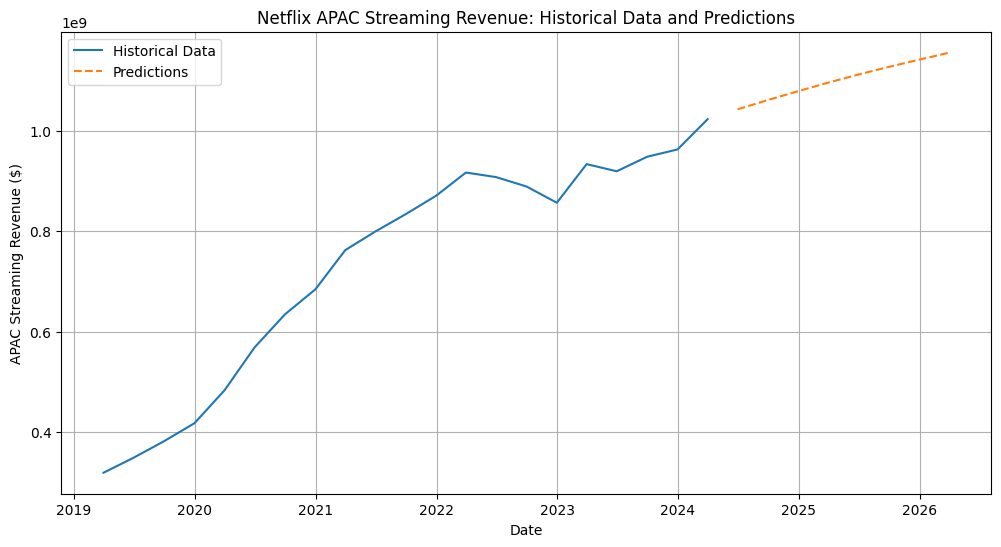

In [14]:
# Visualize historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['APAC Streaming Revenue'], label='Historical Data')
plt.plot(future_df.index, future_df['Predicted Revenue'], label='Predictions', linestyle='--')
plt.title('Netflix APAC Streaming Revenue: Historical Data and Predictions')
plt.xlabel('Date')
plt.ylabel('APAC Streaming Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:

# Print predictions
print("Predicted APAC Streaming Revenue for the next 8 quarters:")
print(future_df)

# Calculate percentage change from last actual revenue
last_actual_revenue = df['APAC Streaming Revenue'].iloc[-1]
future_df['Percentage Change'] = (future_df['Predicted Revenue'] - last_actual_revenue) / last_actual_revenue * 100

print("\nPredictions with percentage change from last actual revenue:")
print(future_df)

Predicted APAC Streaming Revenue for the next 8 quarters:
            Predicted Revenue
2024-06-30       1.042537e+09
2024-09-30       1.061177e+09
2024-12-31       1.078893e+09
2025-03-31       1.095731e+09
2025-06-30       1.111734e+09
2025-09-30       1.126943e+09
2025-12-31       1.141398e+09
2026-03-31       1.155136e+09

Predictions with percentage change from last actual revenue:
            Predicted Revenue  Percentage Change
2024-06-30       1.042537e+09           1.917339
2024-09-30       1.061177e+09           3.739603
2024-12-31       1.078893e+09           5.471509
2025-03-31       1.095731e+09           7.117535
2025-06-30       1.111734e+09           8.681941
2025-09-30       1.126943e+09          10.168774
2025-12-31       1.141398e+09          11.581880
2026-03-31       1.155136e+09          12.924915
